In [2]:
import librosa

#load the audio file
AUDIO_FILE = './output.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

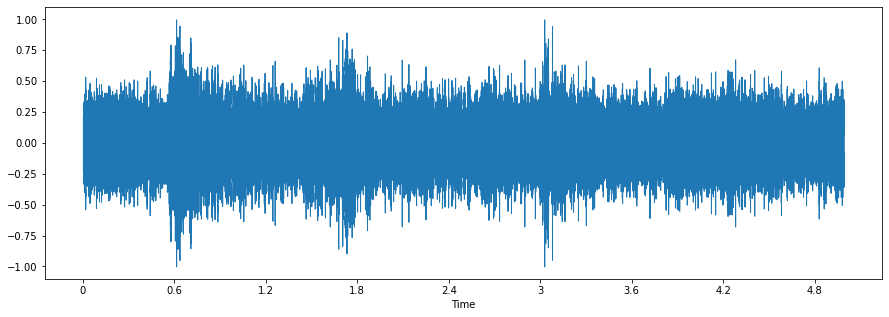

In [6]:
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
librosa.display.waveshow(samples, sr=sample_rate)

In [7]:
from IPython.display import Audio
Audio(AUDIO_FILE)

/home/zzh/.local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


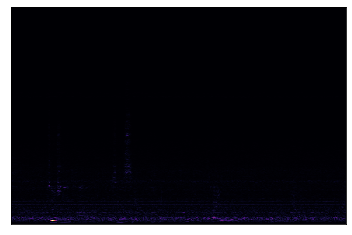

In [8]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

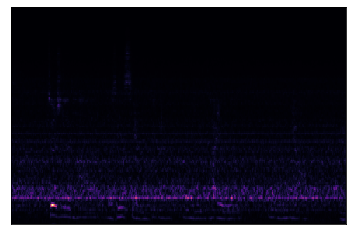

In [9]:
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

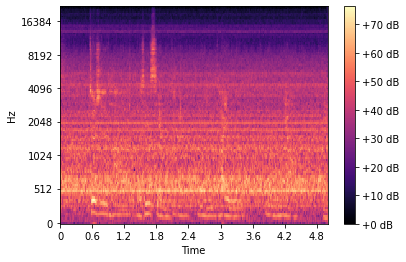

In [11]:
# use the decibel scale to get the final Mel Spectrogram
import numpy as np
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

MFCC is of type <class 'numpy.ndarray'> with shape (20, 431)


/tmp/ipykernel_5954/1613122638.py:7: FutureWarning: Pass y=[ 0.0453186   0.01405334  0.01445007 ... -0.1349945  -0.18858337
 -0.21266174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
/home/zzh/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/zzh/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


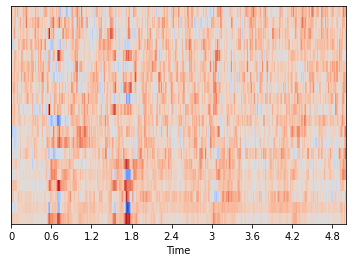

In [12]:
import sklearn
import librosa
import librosa.display

# Load the audio file
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
mfcc = librosa.feature.mfcc(samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
# MFCC is of type <class 'numpy.ndarray'> with shape (20, 134)